<a href="https://colab.research.google.com/github/evi03/MechineLearning/blob/main/Mechine_Learning_UTS_EVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UTS**

Nama: Evi Amalia Midfia

Kelas: TI-3A

Absen: 13

NIM: 2141720030

# **CITRA PERTAMA**

#### **Persiapan Data**

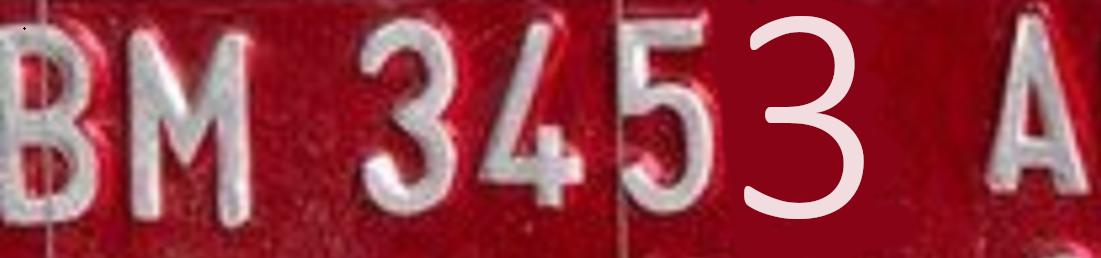

In [254]:
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/UTS/1.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue


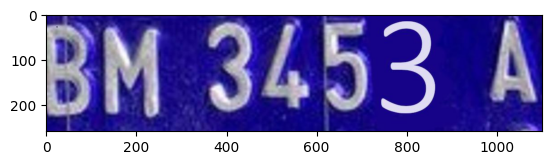

In [255]:
#devault cv2 yaitu bgr
plt.imshow(img)

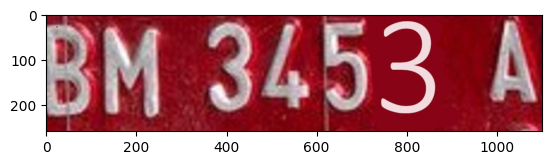

In [256]:
# convert bgr to rgb
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img1)

#### **Informasi tentang citra**

In [257]:
print(img1.dtype)
h, w, ch= img1.shape
print(h)
print(w)
print(ch)

uint8
258
1101
3




> Kode di atas digunakan untuk mendapatkan informasi tentang citra yang dimuat dalam variabel image. h, w, ch = img.shape: Baris ini mengambil nilai shape dari citra yang dimuat dalam variabel image. shape adalah tuple yang berisi tiga elemen:
1. print(h): Menyimpan tinggi citra, yaitu jumlah baris piksel.
2. print(w): Menyimpan lebar citra, yaitu jumlah kolom piksel.
3. print(ch): Menyimpan jumlah channel citra, yang biasanya adalah 3 untuk citra warna (Red, Green, Blue) atau 1 untuk citra grayscale.

> **Output:**
* 258 adalah tinggi gambar/citra dengan jumlah baris piksel 258.
* 1102 adalah lebar gambar/citra dengan jumlah kolom 1102 piksel.
* 3 adalah jumlah channel citra yaitu (Red, Green, Blue).


In [258]:
img1

array([[[116,  21,  25],
        [117,  22,  26],
        [117,  22,  26],
        ...,
        [121,   8,  26],
        [121,   8,  26],
        [123,   7,  26]],

       [[117,  21,  25],
        [117,  21,  25],
        [118,  22,  26],
        ...,
        [121,   8,  26],
        [121,   8,  26],
        [123,   7,  26]],

       [[118,  19,  24],
        [118,  19,  24],
        [119,  20,  25],
        ...,
        [120,   7,  25],
        [120,   7,  25],
        [122,   6,  25]],

       ...,

       [[130,   4,  16],
        [130,   4,  16],
        [130,   4,  16],
        ...,
        [184,  28,  50],
        [183,  27,  48],
        [181,  28,  46]],

       [[131,   6,  20],
        [131,   6,  20],
        [131,   6,  20],
        ...,
        [188,  32,  54],
        [187,  31,  52],
        [185,  32,  50]],

       [[129,   7,  22],
        [129,   7,  22],
        [131,   6,  22],
        ...,
        [188,  32,  54],
        [187,  31,  52],
        [185,  32,  50]]

#### **Pemrosesan Citra**

In [259]:
data = img1 / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

> Kode diatas digunakan untuk pemrosesan citra atau normalisasi citra
1. data = image / 255.0 Digunakan untuk normalisasi citra, dengan rentang nilai piksel antara 0 hingga 255. 0 adalah warna hitam dan 255 adalah warna putih
2. data = data.reshape(h * w, ch) digunakan untuk mengubah bentuk data citra menjadi bentuk matriks dua dimensi dengan jumlah baris (h * w) dan jumlah kolom (ch).
3. data.shape digunakan untuk mencetak bentuk (shape) dari matriks data setelah normalisasi dan reshape. Ini memberikan informasi tentang jumlah baris dan kolom dalam matriks.

> **Output:**
* 284058 adalah jumlah baris (rows) dari matriks data.
* 3 adalah jumlah kolom (columns) dari matriks data.

#### **Segmentasi Warna**

In [260]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

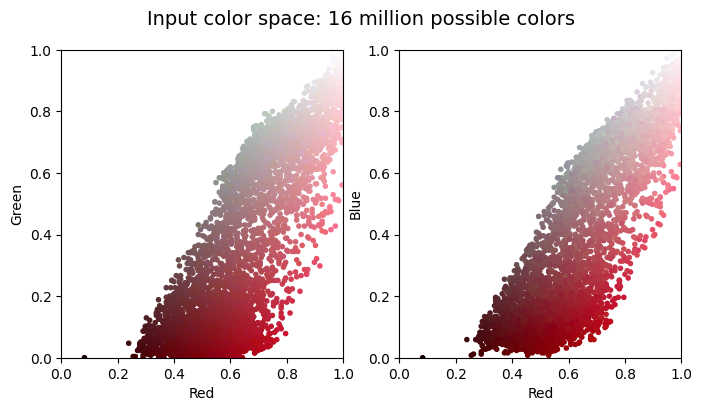

In [261]:
plot_pixels(data, title='Input color space: 16 million possible colors')

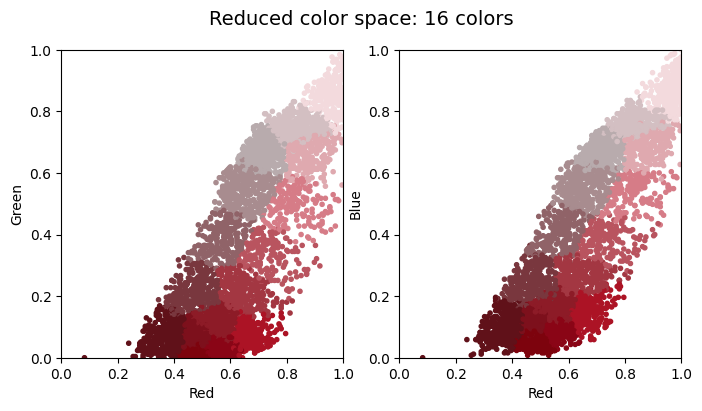

In [262]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

#### **convert int menjadi float**

In [263]:
Z = np.float32(data)

print(Z.dtype, Z.shape)

float32 (284058, 3)


#### **Menentukan nilai k**

In [264]:
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [265]:
print(label)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [266]:
print(center)

[[0.79065996 0.68897045 0.7014017 ]
 [0.5305767  0.07501006 0.12546043]]


#### **Pengelompokan atau klasterisasi**

In [267]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.5305767 , 0.07501006, 0.12546043],
       [0.5305767 , 0.07501006, 0.12546043],
       [0.5305767 , 0.07501006, 0.12546043],
       ...,
       [0.5305767 , 0.07501006, 0.12546043],
       [0.5305767 , 0.07501006, 0.12546043],
       [0.5305767 , 0.07501006, 0.12546043]], dtype=float32)

In [268]:
segmented_image = segmented_data.reshape((img1.shape))
segmented_image

array([[[0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        ...,
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043]],

       [[0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        ...,
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043]],

       [[0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        ...,
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043]],

       ...,

       [[0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0.07501006, 0.12546043],
        [0.5305767 , 0

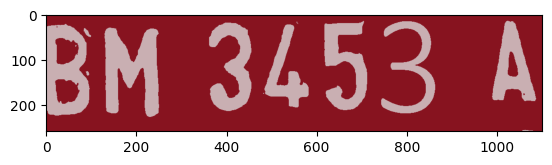

In [269]:
plt.imshow(segmented_image)

#### **Tampilan perbandingan citra sebelum dan sesudah di segmentasi**

Text(0.5, 1.0, '2-color Image')

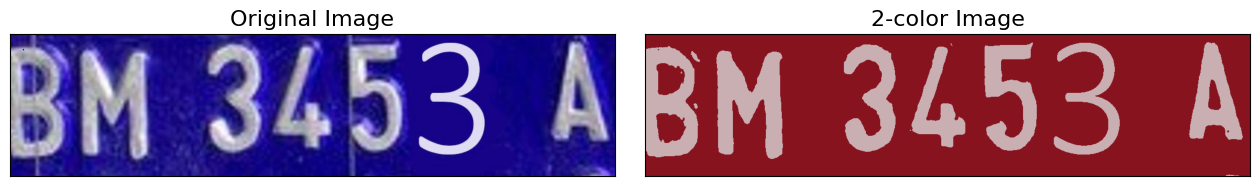

In [270]:
img_recolored = new_colors.reshape(img1.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)

# **CITRA KEDUA**

#### **Persiapan Data**

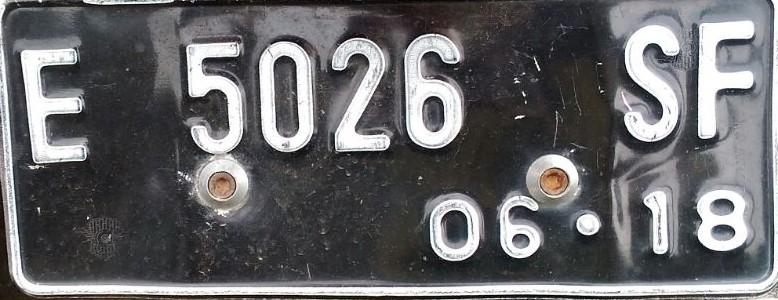

In [271]:
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

# Load Gambar
img2 = cv2.imread('/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/UTS/2.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img2) # khusus google colab karena ada issue


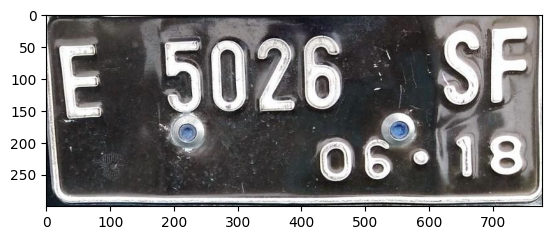

In [272]:
#devault cv2 yaitu bgr
plt.imshow(img2)

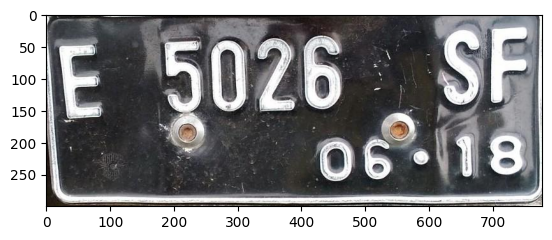

In [273]:
# convert bgr to rgb
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)

#### **Informasi tentang citra**

In [274]:
print(img2.dtype)
h, w, ch= img2.shape
print(h)
print(w)
print(ch)

uint8
300
778
3


In [275]:
img2

array([[[252, 254, 249],
        [254, 255, 251],
        [247, 249, 244],
        ...,
        [250, 252, 251],
        [252, 254, 251],
        [252, 254, 251]],

       [[240, 242, 237],
        [250, 252, 247],
        [250, 252, 247],
        ...,
        [251, 253, 252],
        [252, 254, 251],
        [252, 254, 251]],

       [[254, 255, 253],
        [254, 255, 253],
        [250, 252, 249],
        ...,
        [251, 253, 252],
        [252, 254, 251],
        [252, 254, 251]],

       ...,

       [[ 30,  21,  12],
        [ 31,  22,  13],
        [ 33,  24,  15],
        ...,
        [165, 161, 152],
        [163, 159, 150],
        [163, 159, 150]],

       [[ 31,  22,  13],
        [ 32,  23,  14],
        [ 34,  25,  16],
        ...,
        [225, 221, 212],
        [223, 219, 208],
        [223, 219, 208]],

       [[ 30,  21,  12],
        [ 31,  22,  13],
        [ 33,  24,  15],
        ...,
        [255, 255, 246],
        [255, 254, 243],
        [255, 254, 243]]

#### **Pemrosesan Citra**

In [276]:
data = img2 / 255.0
data = data.reshape(h * w, ch)
data.shape

(233400, 3)

#### **Segmentasi Warna**

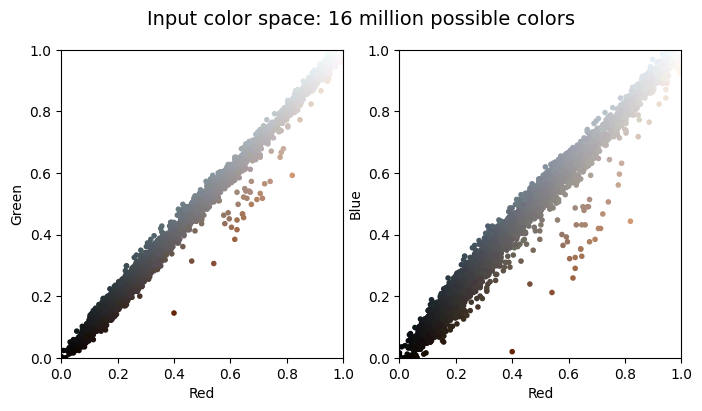

In [277]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

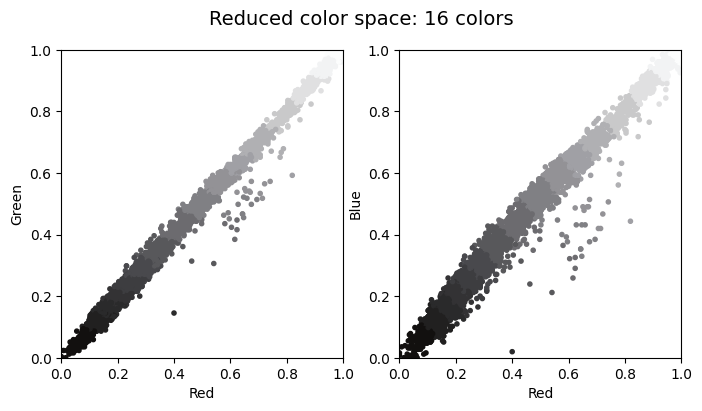

In [278]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

#### **convert int menjadi float**

In [279]:
Z = np.float32(data)

print(Z.dtype, Z.shape)

float32 (233400, 3)


#### **Menentukan nilai k**

In [280]:
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [281]:
print(label)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [282]:
print(center)

[[0.23202722 0.23094082 0.23932037]
 [0.79456085 0.79368615 0.8012854 ]]


#### **Pengelompokan atau klasterisasi**

In [283]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.79456085, 0.79368615, 0.8012854 ],
       [0.79456085, 0.79368615, 0.8012854 ],
       [0.79456085, 0.79368615, 0.8012854 ],
       ...,
       [0.79456085, 0.79368615, 0.8012854 ],
       [0.79456085, 0.79368615, 0.8012854 ],
       [0.79456085, 0.79368615, 0.8012854 ]], dtype=float32)

In [284]:
segmented_image = segmented_data.reshape((img2.shape))
segmented_image

array([[[0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        ...,
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ]],

       [[0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        ...,
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ]],

       [[0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        ...,
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ],
        [0.79456085, 0.79368615, 0.8012854 ]],

       ...,

       [[0.23202722, 0.23094082, 0.23932037],
        [0.23202722, 0.23094082, 0.23932037],
        [0.23202722, 0

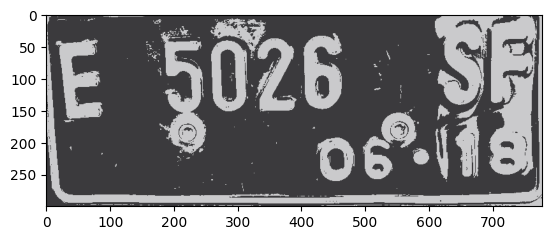

In [285]:
plt.imshow(segmented_image)

#### **Tampilan perbandingan citra sebelum dan sesudah di segmentasi**

Text(0.5, 1.0, '2-color Image')

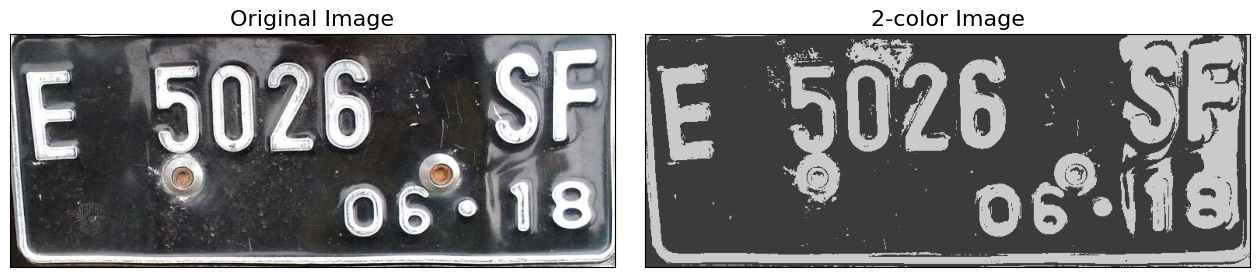

In [286]:
img_recolored = new_colors.reshape(img2.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img2)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)

# **CITRA KETIGA**

**Persiapan Data**

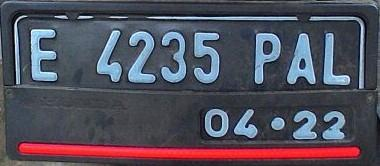

In [287]:
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

# Load Gambar
img3 = cv2.imread('/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/UTS/3.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img3) # khusus google colab karena ada issue


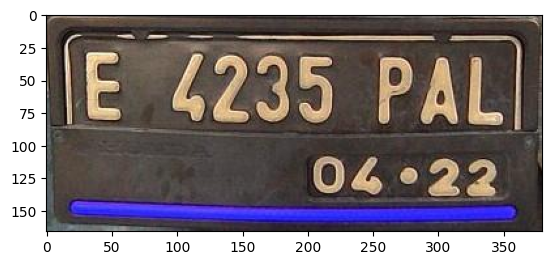

In [288]:
#devault cv2 yaitu bgr
plt.imshow(img3)

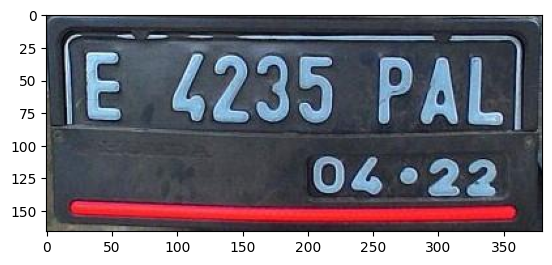

In [289]:
# convert bgr to rgb
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img3)

**Informasi tentang citra**

In [290]:
print(img3.dtype)
h, w, ch= img3.shape
print(h)
print(w)
print(ch)

uint8
166
380
3


In [291]:
img3

array([[[ 66,  74,  85],
        [ 82,  90, 101],
        [ 82,  90, 101],
        ...,
        [100, 104, 115],
        [117, 120, 129],
        [129, 132, 141]],

       [[ 67,  75,  86],
        [ 62,  70,  81],
        [ 55,  63,  74],
        ...,
        [ 77,  81,  92],
        [103, 107, 116],
        [114, 118, 127]],

       [[ 83,  91, 102],
        [ 68,  76,  87],
        [ 72,  80,  91],
        ...,
        [ 89,  96, 106],
        [106, 113, 121],
        [125, 132, 140]],

       ...,

       [[ 98,  99,  83],
        [107, 108,  92],
        [113, 114,  98],
        ...,
        [ 44,  44,  52],
        [ 42,  42,  50],
        [ 41,  41,  49]],

       [[ 97,  98,  82],
        [105, 106,  90],
        [111, 112,  96],
        ...,
        [ 49,  49,  57],
        [ 47,  47,  55],
        [ 47,  47,  55]],

       [[102, 103,  87],
        [105, 106,  90],
        [104, 105,  89],
        ...,
        [ 53,  53,  61],
        [ 51,  51,  59],
        [ 51,  51,  59]]

**Pemrosesan Citra**

In [292]:
data = img3 / 255.0
data = data.reshape(h * w, ch)
data.shape

(63080, 3)

**Segmentasi Warna**

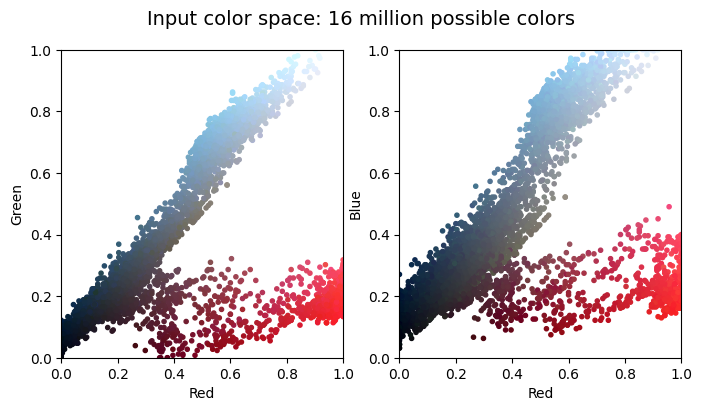

In [293]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

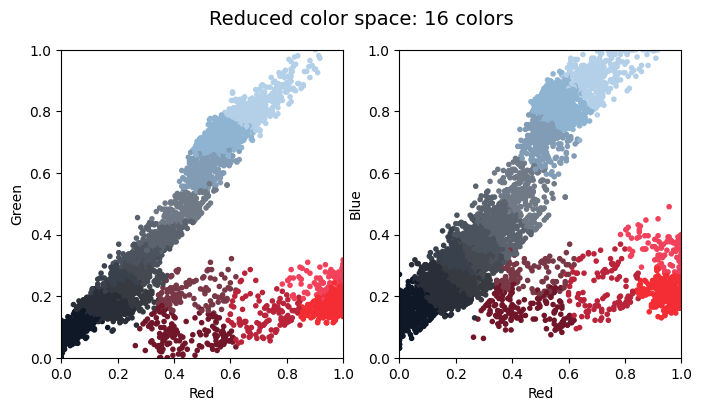

In [294]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

**convert int menjadi float**

In [295]:
Z = np.float32(data)

print(Z.dtype, Z.shape)

float32 (63080, 3)


**Menentukan nilai k**

In [296]:
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [297]:
print(label)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [298]:
print(center)

[[0.28245905 0.24787252 0.28978693]
 [0.5796571  0.7080976  0.8121227 ]]


**Pengelompokan atau klasterisasi**

In [299]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.28245905, 0.24787252, 0.28978693],
       [0.28245905, 0.24787252, 0.28978693],
       [0.28245905, 0.24787252, 0.28978693],
       ...,
       [0.28245905, 0.24787252, 0.28978693],
       [0.28245905, 0.24787252, 0.28978693],
       [0.28245905, 0.24787252, 0.28978693]], dtype=float32)

In [300]:
segmented_image = segmented_data.reshape((img3.shape))
segmented_image

array([[[0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        ...,
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        [0.5796571 , 0.7080976 , 0.8121227 ]],

       [[0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        ...,
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693]],

       [[0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        ...,
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693]],

       ...,

       [[0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0.24787252, 0.28978693],
        [0.28245905, 0

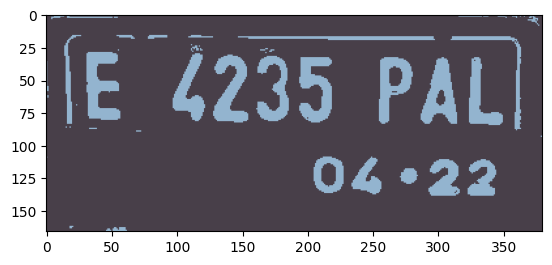

In [301]:
plt.imshow(segmented_image)

**Tampilan perbandingan citra sebelum dan sesudah di segmentasi**

Text(0.5, 1.0, '2-color Image')

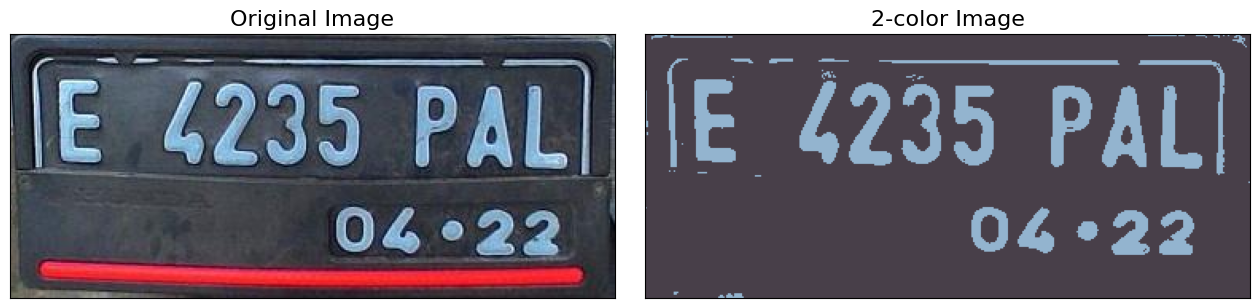

In [302]:
img_recolored = new_colors.reshape(img3.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img3)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)

# **CITRA KEEMPAT**

#### **Persiapan data**

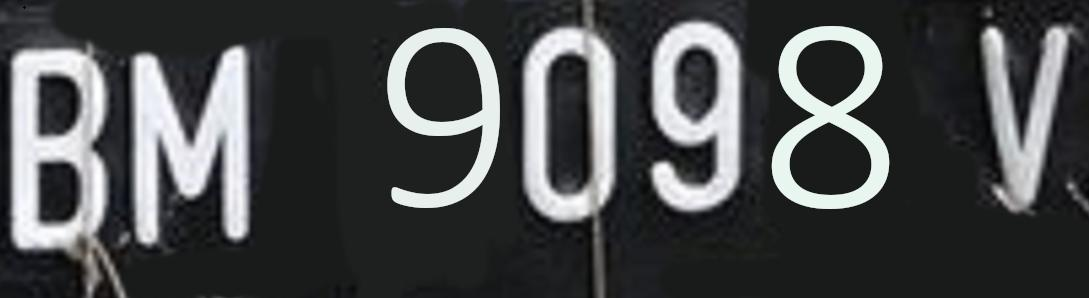

In [303]:
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

# Load Gambar
img4 = cv2.imread('/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/UTS/4.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img4) # khusus google colab karena ada issue


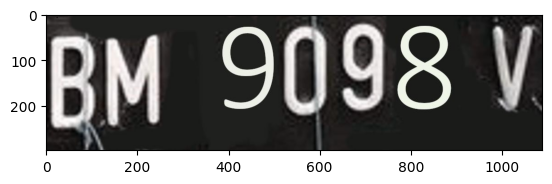

In [304]:
#devault cv2 yaitu bgr
plt.imshow(img4)

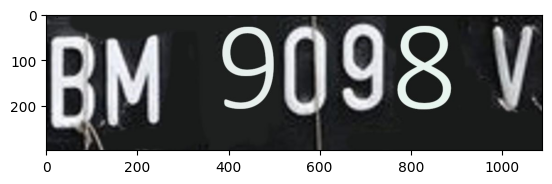

In [305]:
# convert bgr to rgb
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

plt.imshow(img4)

#### **Informasi tentang Citra**

In [306]:
print(img4.dtype)
h, w, ch= img4.shape
print(h)
print(w)
print(ch)

uint8
298
1089
3


In [307]:
img4

array([[[22, 23, 27],
        [21, 22, 26],
        [20, 21, 25],
        ...,
        [25, 25, 27],
        [24, 24, 26],
        [24, 24, 26]],

       [[24, 25, 29],
        [23, 24, 28],
        [22, 23, 27],
        ...,
        [26, 26, 28],
        [25, 25, 27],
        [23, 23, 25]],

       [[26, 27, 31],
        [26, 27, 31],
        [25, 26, 30],
        ...,
        [28, 28, 30],
        [26, 26, 28],
        [23, 23, 25]],

       ...,

       [[21, 22, 24],
        [21, 22, 24],
        [21, 22, 24],
        ...,
        [25, 27, 26],
        [25, 27, 26],
        [25, 27, 26]],

       [[22, 23, 25],
        [22, 23, 25],
        [22, 23, 25],
        ...,
        [25, 27, 26],
        [25, 27, 26],
        [25, 27, 26]],

       [[22, 23, 25],
        [22, 23, 25],
        [22, 23, 25],
        ...,
        [25, 27, 26],
        [25, 27, 26],
        [25, 27, 26]]], dtype=uint8)

#### **Pemrosesan Citra**

In [308]:
data = img4 / 255.0
data = data.reshape(h * w, ch)
data.shape

(324522, 3)

#### **Segmentasi Warna**

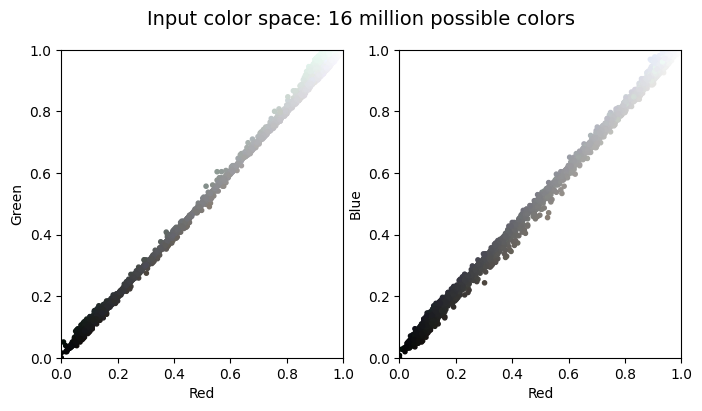

In [309]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

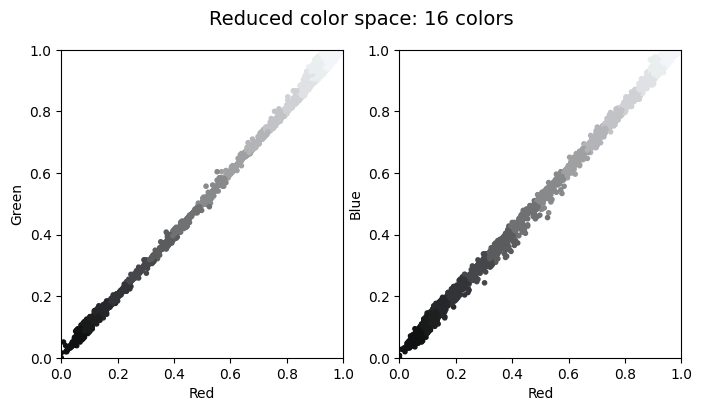

In [310]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

#### **convert int menjadi float**

In [311]:
Z = np.float32(data)

print(Z.dtype, Z.shape)

float32 (324522, 3)


#### **Menentukan nilai k**

In [312]:
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [313]:
print(label)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [314]:
print(center)

[[0.83357155 0.84438705 0.8518654 ]
 [0.12404278 0.12996516 0.1323872 ]]


#### **Pengelompokan atau klasterisasi**

In [315]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.12404278, 0.12996516, 0.1323872 ],
       [0.12404278, 0.12996516, 0.1323872 ],
       [0.12404278, 0.12996516, 0.1323872 ],
       ...,
       [0.12404278, 0.12996516, 0.1323872 ],
       [0.12404278, 0.12996516, 0.1323872 ],
       [0.12404278, 0.12996516, 0.1323872 ]], dtype=float32)

In [316]:
segmented_image = segmented_data.reshape((img4.shape))
segmented_image

array([[[0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        ...,
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ]],

       [[0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        ...,
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ]],

       [[0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        ...,
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ]],

       ...,

       [[0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0.12996516, 0.1323872 ],
        [0.12404278, 0

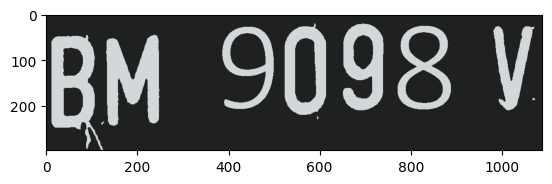

In [317]:
plt.imshow(segmented_image)

#### **Tampilan perbandingan citra sebelum dan sesudah di segmentasi**

Text(0.5, 1.0, '2-color Image')

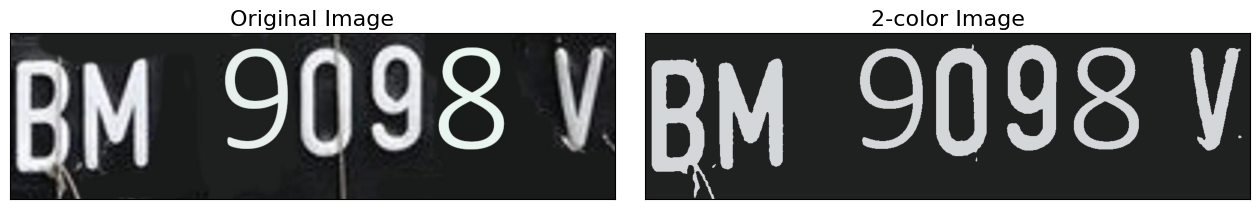

In [318]:
img_recolored = new_colors.reshape(img4.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img4)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)

# **CITRA KELIMA**

#### **Persiapan Data**

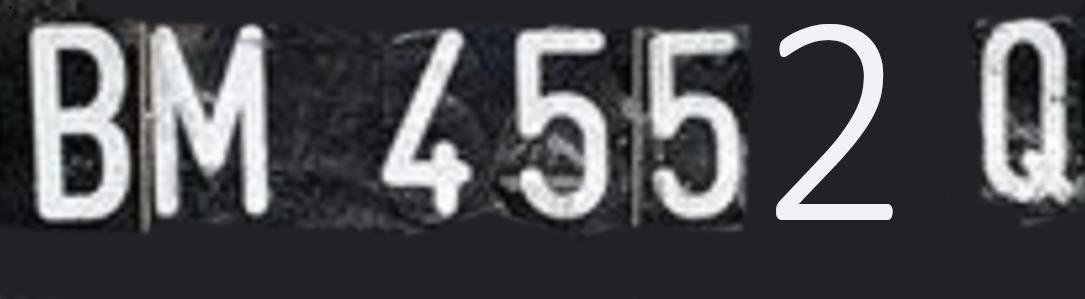

In [319]:
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

# Load Gambar
img5 = cv2.imread('/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/UTS/5.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img5) # khusus google colab karena ada issue


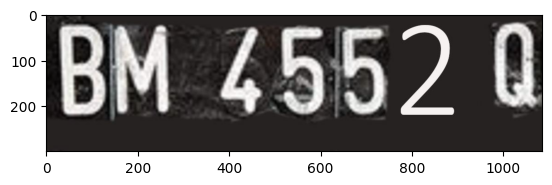

In [320]:
#devault cv2 yaitu bgr
plt.imshow(img5)

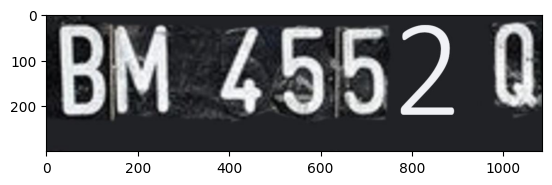

In [321]:
# convert bgr to rgb
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

plt.imshow(img5)

#### **Informasi tentang Citra**

In [322]:
print(img5.dtype)
h, w, ch= img5.shape
print(h)
print(w)
print(ch)

uint8
299
1085
3


In [323]:
img5

array([[[23, 24, 26],
        [27, 28, 30],
        [33, 34, 36],
        ...,
        [31, 32, 36],
        [30, 31, 35],
        [30, 31, 35]],

       [[24, 25, 27],
        [27, 28, 30],
        [34, 35, 37],
        ...,
        [31, 32, 36],
        [30, 31, 35],
        [30, 31, 35]],

       [[25, 26, 28],
        [29, 30, 32],
        [34, 35, 37],
        ...,
        [30, 31, 35],
        [29, 30, 34],
        [29, 30, 34]],

       ...,

       [[44, 43, 48],
        [42, 41, 46],
        [39, 38, 43],
        ...,
        [33, 34, 38],
        [33, 34, 38],
        [33, 34, 38]],

       [[45, 44, 49],
        [43, 42, 47],
        [40, 39, 44],
        ...,
        [33, 34, 38],
        [33, 34, 38],
        [33, 34, 38]],

       [[47, 45, 50],
        [45, 43, 48],
        [42, 40, 45],
        ...,
        [33, 34, 38],
        [33, 34, 38],
        [33, 34, 38]]], dtype=uint8)

#### **Pemrosesan Citra**

In [324]:
data = img5 / 255.0
data = data.reshape(h * w, ch)
data.shape

(324415, 3)

#### **Segmentasi Warna**

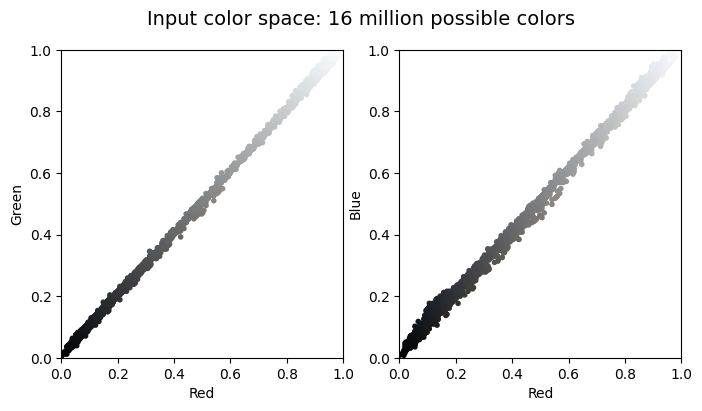

In [325]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

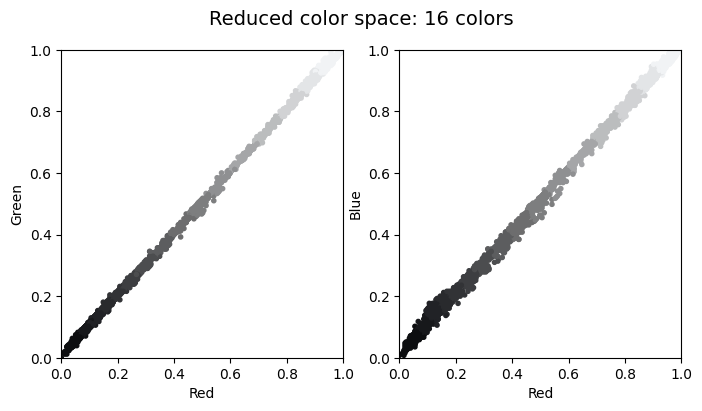

In [326]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

#### **convert int menjadi float**

In [327]:
Z = np.float32(data)

print(Z.dtype, Z.shape)

float32 (324415, 3)


#### **Menentukan nilai k**

In [328]:
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [329]:
print(label)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [330]:
print(center)

[[0.15333138 0.15714552 0.17088193]
 [0.84580934 0.85106933 0.85923356]]


#### **Pengelompokan atau klasterisasi**

In [331]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.15333138, 0.15714552, 0.17088193],
       [0.15333138, 0.15714552, 0.17088193],
       [0.15333138, 0.15714552, 0.17088193],
       ...,
       [0.15333138, 0.15714552, 0.17088193],
       [0.15333138, 0.15714552, 0.17088193],
       [0.15333138, 0.15714552, 0.17088193]], dtype=float32)

In [332]:
segmented_image = segmented_data.reshape((img5.shape))
segmented_image

array([[[0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        ...,
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193]],

       [[0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        ...,
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193]],

       [[0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        ...,
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193]],

       ...,

       [[0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0.15714552, 0.17088193],
        [0.15333138, 0

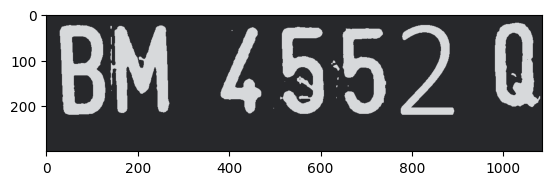

In [333]:
plt.imshow(segmented_image)

#### **Tampilan perbandingan citra sebelum dan sesudah di segmentasi**

Text(0.5, 1.0, '2-color Image')

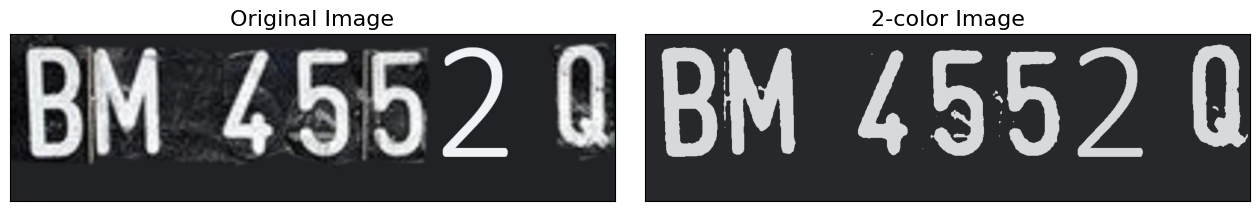

In [334]:
img_recolored = new_colors.reshape(img5.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img5)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)